In [197]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [198]:
df = pd.read_csv('Gapminder.csv')

In [199]:
y = df['life'].values
X = df.loc[:,['fertility','population','GDP']].values

In [200]:
y

array([75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1,
       79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2,
       56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8,
       78.7, 61. , 74. , 70.1, 74.1, 56.7, 60.4, 74. , 65.7, 79.4, 81. ,
       57.5, 62.2, 72.1, 80. , 62.7, 79.5, 70.8, 58.3, 51.3, 63. , 61.7,
       70.9, 73.8, 82. , 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6,
       66.1, 61.5, 72.3, 77.6, 45.2, 61. , 72. , 80.7, 63.4, 51.4, 74.5,
       78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55. , 60.8,
       68.6, 80.3, 80.2, 75.2, 59.7, 58. , 80.7, 74.6, 64.1, 77.1, 58.2,
       73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4,
       55.9, 80.9, 74.8, 78.5, 56.7, 55. , 81.1, 74.3, 67.4, 69.1, 46.1,
       81.1, 81.9, 69.5, 59.7, 74.1, 60. , 71.3, 76.5, 75.1, 57.2, 68.2,
       79.5, 78.2, 76. , 68.7, 75.4, 52. , 49. ])

In [201]:
type(X)

numpy.ndarray

In [202]:
y_pd = pd.DataFrame(y)
#y_pd

In [203]:
X_pd = pd.DataFrame(X)
#X_pd

In [204]:
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139, 3)


In [205]:
#y = y.reshape(-1,1)
#X = X.reshape(-1,1)

In [206]:
X_pd = pd.DataFrame(X)
#X_pd

In [207]:
y_pd = pd.DataFrame(y)
#y_pd

In [208]:
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139,)
Dimensions of X after reshaping: (139, 3)


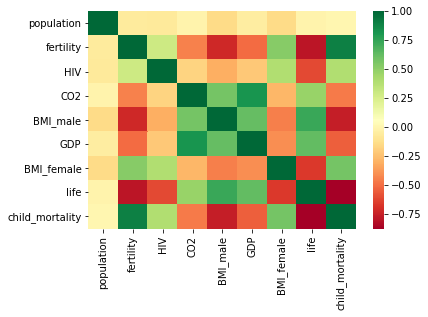

In [209]:
sns.heatmap(df.corr(), square= False, cmap='RdYlGn')

In [210]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


In [211]:
X_fertility = np.array(df.fertility)
X_fertility
#type(X_fertility)

array([2.73, 6.43, 2.24, 1.4 , 1.96, 1.41, 1.99, 1.89, 2.38, 1.83, 1.42,
       1.82, 2.91, 5.27, 2.51, 3.48, 2.86, 1.9 , 1.43, 6.04, 6.48, 3.05,
       5.17, 1.68, 6.81, 1.89, 2.43, 5.05, 5.1 , 1.91, 4.91, 1.43, 1.5 ,
       1.89, 3.76, 2.73, 2.95, 2.32, 5.31, 5.16, 1.62, 2.74, 1.85, 1.97,
       4.28, 5.8 , 1.79, 1.37, 4.19, 1.46, 4.12, 5.34, 5.25, 2.74, 3.5 ,
       3.27, 1.33, 2.12, 2.64, 2.48, 1.88, 2.  , 2.92, 1.39, 2.39, 1.34,
       2.51, 4.76, 1.5 , 1.57, 3.34, 5.19, 1.42, 1.63, 4.79, 5.78, 2.05,
       2.38, 6.82, 1.38, 4.94, 1.58, 2.35, 1.49, 2.37, 2.44, 5.54, 2.05,
       2.9 , 1.77, 2.12, 2.72, 7.59, 6.02, 1.96, 2.89, 3.58, 2.61, 4.07,
       3.06, 2.58, 3.26, 1.33, 1.36, 2.2 , 1.34, 1.49, 5.06, 5.11, 1.41,
       5.13, 1.28, 1.31, 1.43, 7.06, 2.54, 1.42, 2.32, 4.79, 2.41, 3.7 ,
       1.92, 1.47, 3.7 , 5.54, 1.48, 4.88, 1.8 , 2.04, 2.15, 6.34, 1.38,
       1.87, 2.07, 2.11, 2.46, 1.86, 5.88, 3.85])

In [212]:
y = np.array(df.life)
#y
#type(y)

array([75.3, 58.3, 75.5, 72.5, 81.5, 80.4, 70.6, 72.2, 68.4, 75.3, 70.1,
       79.4, 70.7, 63.2, 67.6, 70.9, 61.2, 73.9, 73.2, 59.4, 57.4, 66.2,
       56.6, 80.7, 54.8, 78.9, 75.1, 62.6, 58.6, 79.7, 55.9, 76.5, 77.8,
       78.7, 61. , 74. , 70.1, 74.1, 56.7, 60.4, 74. , 65.7, 79.4, 81. ,
       57.5, 62.2, 72.1, 80. , 62.7, 79.5, 70.8, 58.3, 51.3, 63. , 61.7,
       70.9, 73.8, 82. , 64.4, 69.5, 76.9, 79.4, 80.9, 81.4, 75.5, 82.6,
       66.1, 61.5, 72.3, 77.6, 45.2, 61. , 72. , 80.7, 63.4, 51.4, 74.5,
       78.2, 55.8, 81.4, 63.6, 72.1, 75.7, 69.6, 63.2, 73.3, 55. , 60.8,
       68.6, 80.3, 80.2, 75.2, 59.7, 58. , 80.7, 74.6, 64.1, 77.1, 58.2,
       73.6, 76.8, 69.4, 75.3, 79.2, 80.4, 73.4, 67.6, 62.2, 64.3, 76.4,
       55.9, 80.9, 74.8, 78.5, 56.7, 55. , 81.1, 74.3, 67.4, 69.1, 46.1,
       81.1, 81.9, 69.5, 59.7, 74.1, 60. , 71.3, 76.5, 75.1, 57.2, 68.2,
       79.5, 78.2, 76. , 68.7, 75.4, 52. , 49. ])

In [216]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [217]:
reg_all = LinearRegression()
reg_all

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [218]:
# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

In [220]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7111356048852674
Root Mean Squared Error: 4.337255594305721
